A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?
## El mejor resultado, curiosamente, lo da el modelo con menos capas (al añadir la Dense de 16 neuronas se pierde accuracy)

Para compilar el modelo, usa:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist.load_data()

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
train_images.shape

(60000, 28, 28, 1)

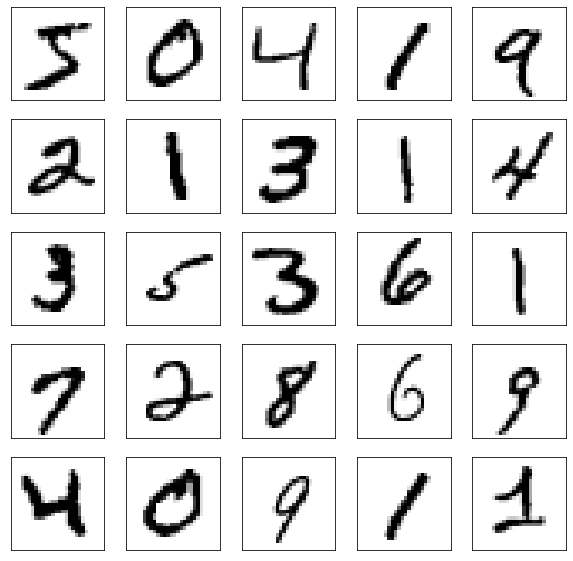

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [23]:
model = models.Sequential([
        layers.Conv2D(filters=8,
                        kernel_size=(4, 4),
                        input_shape=(28, 28, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),                
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                50208     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 50,674
Trainable params: 50,674
Non-trainable params: 0
____________________________________________________

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4850 - accuracy: 0.8570
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1391 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1069 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9803
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9830
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.050

In [26]:
model2 = models.Sequential([
        layers.Conv2D(filters=8,
                        kernel_size=(4, 4),
                        input_shape=(28, 28, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax'),
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                25104     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [27]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6447 - accuracy: 0.7970
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1949 - accuracy: 0.9402
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1510 - accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9608
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1117 - accuracy: 0.9655
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0973 - accuracy: 0.9698
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9723
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9737
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9760
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.073